In [1]:
# for basic operations
import pandas as pd
import numpy as np

#for visualization
from matplotlib import pyplot as plt
import seaborn as sns

#for machine learning
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# for math formulas
import math

# for statistics
from scipy import stats
import scipy as sci

import random

sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
df = pd.read_csv('data\GSM1586785_ScrH-12A_Exd_14mer_cg.csv')
df

,Unnamed: 0,Kmer,y_1,y_2,y_3,y_4,y_5,y_6,zC_1,zC_2,...,zW_76,zW_77,zW_78,y_79,y_80,y_81,y_82,y_83,y_84,relKa
0,0,AATGATTAATTACC,0.593697,-1.092779,0.309117,0.133525,0.023403,-0.157348,1.177586,-2.166888,...,-0.674709,10.019444,-1.012806,-0.790300,-0.112492,0.118705,0.237596,-0.009713,0.267886,1.000000
1,1,GGTAATTAATCATT,0.790300,-0.112492,0.118705,-0.237596,-0.009713,0.267886,2.591673,-3.422281,...,-0.986852,9.851130,-1.990198,-0.593697,-1.092779,0.309117,-0.133525,0.023403,-0.157348,1.000000
2,2,AATGATTAATTACT,0.593690,-1.092780,0.309116,0.133525,0.023403,-0.157348,1.177587,-2.166890,...,-0.839165,10.065669,-1.499679,-0.826872,-1.141872,0.500342,-0.143809,0.043456,0.095141,0.968830
3,3,AGTAATTAATCATT,0.826872,-1.141872,0.500342,0.143809,0.043456,0.095141,2.137980,-2.777053,...,-0.986851,9.851129,-1.990198,-0.593690,-1.092780,0.309116,-0.133525,0.023403,-0.157348,0.968830
4,4,AGGTAATTAATCAT,1.260372,-0.870861,0.397555,0.124897,0.053255,0.213696,1.977567,-2.851909,...,-0.960712,9.943948,-1.806082,0.336528,-0.596511,0.184099,-0.075285,0.032807,0.149085,0.968752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170576,170576,AAATAAATCAAAAA,0.876056,-1.165222,0.321638,0.106295,0.028863,-0.202603,1.139074,-1.939220,...,-0.779331,9.794168,-1.737971,0.085539,-0.955026,0.025427,0.256477,0.048950,0.080873,0.076591
170577,170577,TAATTGTTTTTTTT,0.585035,-0.150802,0.171198,-0.256918,0.058377,0.181906,1.209817,-3.391274,...,-1.162514,9.929123,-1.934750,-1.023253,-0.926061,0.372899,-0.098051,0.026279,-0.269782,0.073354
170578,170578,AAAAAAAACAATTA,1.023253,-0.926061,0.372899,0.098051,0.026279,-0.269782,1.151259,-1.899359,...,-0.832287,9.702945,-1.787255,-0.585035,-0.150802,0.171198,0.256918,0.058377,0.181906,0.073354
170579,170579,TTATTTTTTTAATT,-0.413908,-0.828290,0.190382,-0.246474,0.039222,0.122640,0.331353,-3.875098,...,-0.978912,9.863057,-1.994680,-0.735610,-1.194044,0.298711,-0.138674,0.028309,-0.129401,0.073150


In [3]:
df.drop(columns = 'Unnamed: 0', inplace = True)
df.drop(columns = 'Kmer', inplace = True)

### Outliers remotion

In [4]:
# Worse performances

from sklearn.ensemble import IsolationForest

def Anomaly_Detection_Isolation_Forests(x, change_split=True):
  random_state = np.random.RandomState(42)
  contamination = 'auto'
  threshold = np.random.uniform(-0.03, -0.02, 1)
  model = IsolationForest(n_estimators=120, max_samples='auto', contamination=contamination, random_state=random_state)
  model.fit(x)
  scores = model.decision_function(x)
  if change_split == False:
    anomaly_score = model.predict(x)
    outliers_indices = np.where(anomaly_score == -1)[0]
  if change_split == True:
    outliers_indices = split_outliers(threshold, scores)
  return contamination, scores, outliers_indices

def check_Isolation_Forests(contamination, outliers_indices):
  """
  Simply a check on the proper working of the IF algorithm
  """
  tol = 1.0e-02
  if contamination != 'auto':
    outliers_percentage = 1 / len(RelKa) * len(outliers_indices)
    assert np.abs(contamination-outliers_percentage) < tol

def check_boundary_decision(scores, p, verbose=1):
  """
  This function simply controls how many scores returned by the IF algorithm 
  are likely to be misclassified
  """
  indecision_percentage = 1 / len(y) * np.count_nonzero(np.abs(scores) <= p)
  if verbose == 1:
    plt.hist(scores)
    plt.show()
    print("The indecision percentage around", p,  "is", indecision_percentage)
    print("The percentage of outliers detected is", 1 / len(scores) * len(np.where(scores < 0)[0]))

def drop_outliers(x, y, outliers):
  x = np.delete(x, outliers, axis=0)
  y = np.delete(y, outliers, axis=0)
  return x, y

In [5]:
y = df['relKa'].to_numpy()
x = df.loc[:, df.columns != 'relKa'].to_numpy()

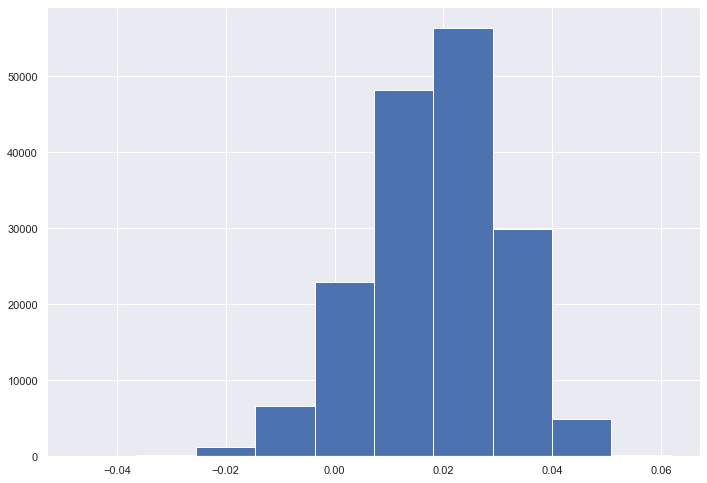

The indecision percentage around 0.02 is 0.5208317456223144
The percentage of outliers detected is 0.0773825924340929


In [6]:
contamination, scores, outliers_indices = Anomaly_Detection_Isolation_Forests(x, change_split=False)
check_Isolation_Forests(contamination, outliers_indices)
check_boundary_decision(scores, 0.02, verbose=1)

In [7]:
y[outliers_indices].shape[0]

13200

In [8]:
x, y = drop_outliers(x, y, outliers_indices)

### Undersampling

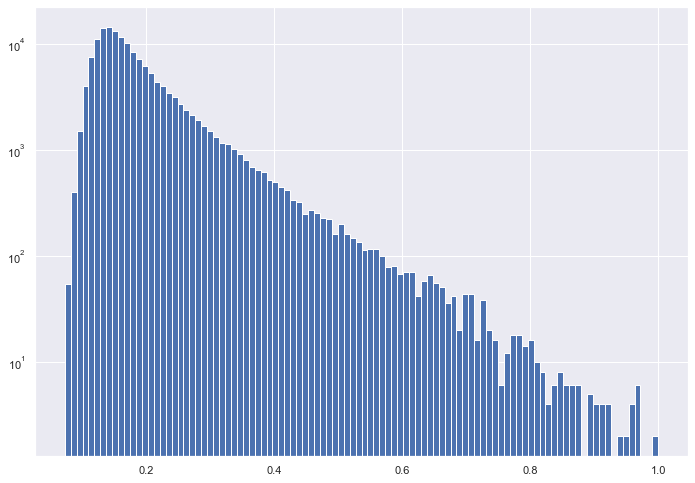

In [9]:
plt.hist(y, bins=100)
plt.yscale('log')
plt.show()

In [10]:
intervals = [[0,0.2],[0.2,0.4],[0.4,0.6],[0.6,0.8],[0.8,1]]
ratios = [0.1, 0.3, 0.5, 1, 1]

def undersampling(x, y, ratios, intervals):
    
    undersampled_x = np.zeros(x.shape[1])
    undersampled_x = undersampled_x[..., np.newaxis].T
    undersampled_y = np.array([])
    i = 0
    for interval in intervals:
        indices_interval = np.where((y >= interval[0]) & (y<= interval[1]))
        indices_interval = indices_interval[0]
        sample_length = np.int(ratios[i]*indices_interval.shape[0])
        indices_picked = random.sample(list(indices_interval), sample_length)
        x_sampled = x[indices_picked, :]
        y_sampled = y[indices_picked]
        undersampled_x = np.concatenate([undersampled_x, x_sampled], axis=0)
        undersampled_y = np.concatenate([undersampled_y, y_sampled], axis=0)
        i +=1
    return undersampled_x, undersampled_y

undersampled_x, undersampled_y = undersampling(x, y, ratios, intervals)
undersampled_x = np.delete(undersampled_x, 0, axis = 0)

[]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]


C:\Users\Luca\AppData\Local\Temp/ipykernel_67376/800557176.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sample_length = np.int(ratios[i]*indices_interval.shape[0])


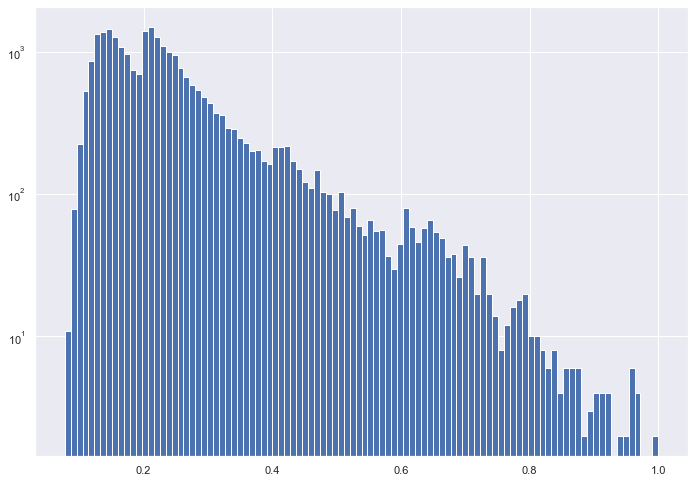

In [11]:
plt.hist(undersampled_y, bins=100)
plt.yscale('log')
plt.show()

### Boxcox transformation

In [12]:
undersampled_y, fitted_lambda= stats.boxcox(list(undersampled_y),lmbda=None)
undersampled_y = np.array(undersampled_y)
#inv_boxcox(y,fitted_lambda)

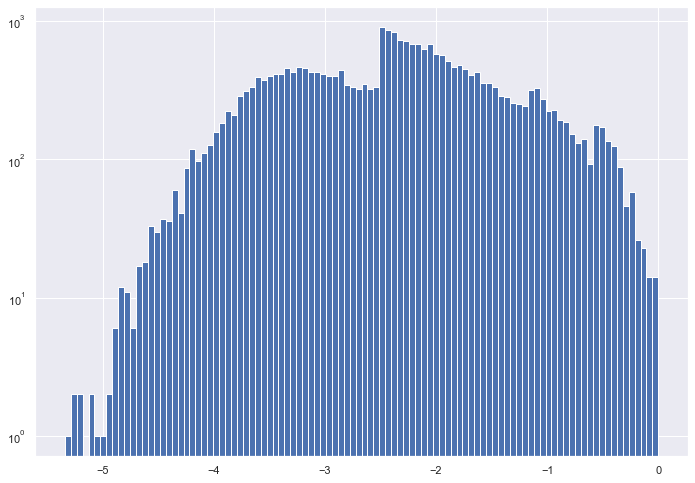

In [13]:
plt.hist(undersampled_y, bins=100)
plt.yscale('log')
plt.show()

In [15]:
x_train, x_test, y_train, y_test = train_test_split(undersampled_x, undersampled_y, test_size=0.30, random_state=42)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [16]:
model = XGBRegressor(subsample = 0.8999999999999999, n_estimators= 500,
                     max_depth = 20, learning_rate = 0.01, colsample_bytree = 0.7999999999999999, colsample_bylevel = 0.6)
model.fit(x_train, y_train)
predictions = model.predict(x_test)

In [17]:
predictions = sci.special.inv_boxcox(predictions, fitted_lambda)
y_test = sci.special.inv_boxcox(y_test, fitted_lambda)
undersampled_y = sci.special.inv_boxcox(undersampled_y , fitted_lambda)

In [18]:
print('the MSE for tuned model XGB Regressor is', MSE(y_test, predictions))

the MSE for tuned model XGB Regressor is 0.0020728490918656577


Visualization of the results

[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95]


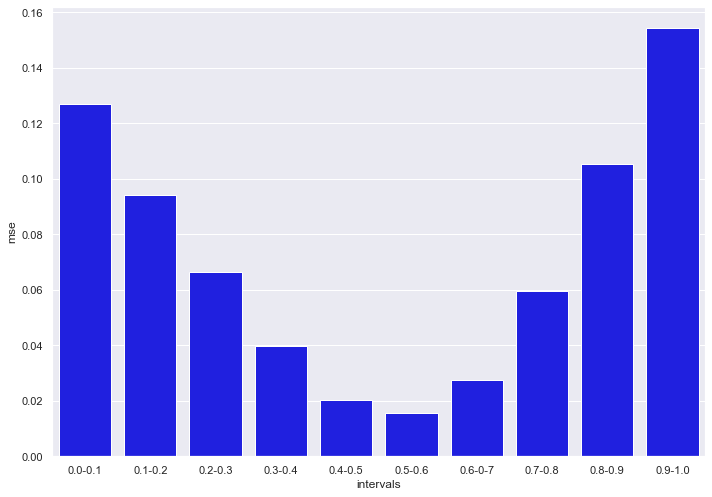

In [19]:
range_values = np.arange(0.05,1.05,0.1)
mse_ranges = []
print(range_values)
for val in range_values:
    labels_range = y[np.where(np.abs(y_test-val)<=0.05)]
    correspondent_predictions = predictions[np.where(np.abs(y_test-val)<=0.05)]
    mse_ranges.append(MSE(correspondent_predictions, labels_range))
sns.set(rc={'figure.figsize':(11.7,8.27)})
intervals = ['0.0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4','0.4-0.5', '0.5-0.6', '0.6-0-7', '0.7-0.8', '0.8-0.9', '0.9-1.0']
dict_mse = {'intervals': intervals, 'mse': mse_ranges}
df_mse = pd.DataFrame.from_dict(dict_mse)
sns.barplot(x = df_mse['intervals'], y = df_mse['mse'], color='blue')
plt.show()

#### hyperparameters tuning

In [20]:
undersampled_y, fitted_lambda= stats.boxcox(list(undersampled_y),lmbda=None)
undersampled_y = np.array(undersampled_y)

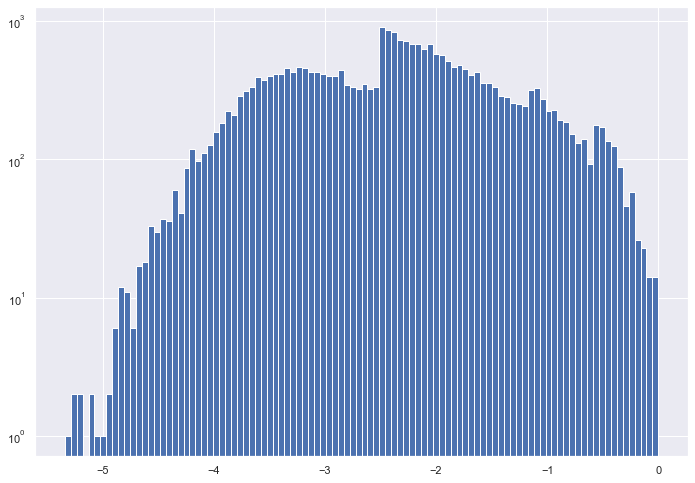

In [21]:
plt.hist(undersampled_y, bins=100)
plt.yscale('log')
plt.show()

In [22]:
x_train, x_test, y_train, y_test = train_test_split(undersampled_x, undersampled_y, test_size=0.30, random_state=42)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
params = { 'max_depth': [5, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.5],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.5, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
           'n_estimators': [100, 500, 1000],
            }
model = XGBRegressor(seed = 20)
clf = RandomizedSearchCV(estimator = model,
                         param_distributions = params,
                         scoring='neg_mean_squared_error',
                         n_iter=10,
                         verbose=10)
clf.fit(x_train, y_train)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START colsample_bylevel=0.8999999999999999, colsample_bytree=0.7999999999999999, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.6
[CV 1/5; 1/10] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.7999999999999999, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.6; total time=  12.7s
[CV 2/5; 1/10] START colsample_bylevel=0.8999999999999999, colsample_bytree=0.7999999999999999, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.6
[CV 2/5; 1/10] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.7999999999999999, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.6; total time=  13.1s
[CV 3/5; 1/10] START colsample_bylevel=0.8999999999999999, colsample_bytree=0.7999999999999999, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.6
[CV 3/5; 1/10] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.7999999999999999,

In [ ]:
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))
predictions = clf.predict(x_test)

In [ ]:
predictions = sci.special.inv_boxcox(predictions, fitted_lambda)
y_test = sci.special.inv_boxcox(y_test, fitted_lambda)
undersampled_y = sci.special.inv_boxcox(undersampled_y , fitted_lambda)

In [ ]:
print('the MSE for tuned model XGB Regressor is', MSE(y_test, predictions))
range_values = np.arange(0.05,1.05,0.1)
mse_ranges = []
print(range_values)
for val in range_values:
    labels_range = y[np.where(np.abs(y_test-val)<=0.05)]
    correspondent_predictions = predictions[np.where(np.abs(y_test-val)<=0.05)]
    mse_ranges.append(MSE(correspondent_predictions, labels_range))
sns.set(rc={'figure.figsize':(11.7,8.27)})
intervals = ['0.0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4','0.4-0.5', '0.5-0.6', '0.6-0-7', '0.7-0.8', '0.8-0.9', '0.9-1.0']
dict_mse = {'intervals': intervals, 'mse': mse_ranges}
df_mse = pd.DataFrame.from_dict(dict_mse)
sns.barplot(x = df_mse['intervals'], y = df_mse['mse'], color='blue')
plt.show()